In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyarrow.feather as feather

from datetime import datetime, timedelta
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

%matplotlib inline

In [2]:
# database_total = 'data\\upbit_total\\'
# database_feather = 'data\\upbit_feather\\'
# database_2023 = 'data\\upbit_2023\\upbit\\'
# database_2024 = 'data\\upbit_2024\\upbit\\'
# data_total = os.listdir(database_total)
# data_feather = os.listdir(database_feather)
# data_2023 = os.listdir(database_2023)
# data_2024 = os.listdir(database_2024)

In [4]:
database = os.getcwd() + '/data2/'

In [6]:
new_columns = {
    '시각_utc': 'datetime',
    '시장-코인': 'coin',
    '시가':'open',
    '고가':'high',
    '저가':'low',
    '종가':'close',
    '누적거래금액':'volume'
}

In [57]:
d1 = pd.read_csv(database+'KRW-BTC.csv')
d1 = d1.rename(columns=new_columns)
d1 = d1.drop(columns=['시각_kst', '누적거래량'])
d1 = d1.drop_duplicates()
d1 = d1.pivot(index='datetime', columns='coin', values='close')
d1 = d1.reset_index()
d1['datetime'] = pd.to_datetime(d1['datetime'])
d1 = d1[d1['datetime'] >= datetime(2018,1,1,0,0,0)]
d1.columns.name = ''

In [58]:
for code in os.listdir(database):
    if code == 'KRW-BTC.csv': continue
    df = pd.read_csv(database + code)
    df = df.rename(columns=new_columns)
    df = df.drop(columns=['시각_kst', '누적거래량'])
    df = df.drop_duplicates()
    df = df.pivot(index='datetime', columns='coin', values='close')
    df = df.reset_index()
    df['datetime'] = pd.to_datetime(df['datetime'])
    df = df[df['datetime'] >= datetime(2018,1,1,0,0,0)]
    d1 = pd.merge(d1, df, how='left').ffill()
    print(code, end=' ')

KRW-1INCH.csv KRW-MOC.csv KRW-CBK.csv KRW-MASK.csv KRW-IMX.csv KRW-ELF.csv KRW-IQ.csv KRW-FLOW.csv KRW-HUNT.csv KRW-DKA.csv KRW-AXS.csv KRW-BSV.csv KRW-GMT.csv KRW-ETC.csv KRW-ASTR.csv KRW-ID.csv KRW-NEAR.csv KRW-KNC.csv KRW-AUCTION.csv KRW-ONG.csv KRW-THETA.csv KRW-ZETA.csv KRW-GAME2.csv KRW-HIFI.csv KRW-ONT.csv KRW-LSK.csv KRW-KAVA.csv KRW-GAS.csv KRW-IOTA.csv KRW-CTC.csv KRW-HBAR.csv KRW-MTL.csv KRW-SAND.csv KRW-PUNDIX.csv KRW-UPP.csv KRW-MNT.csv KRW-MLK.csv KRW-IOST.csv KRW-VET.csv KRW-MATIC.csv KRW-POLYX.csv KRW-AAVE.csv KRW-STX.csv KRW-XEM.csv KRW-ZIL.csv KRW-SNT.csv KRW-MANA.csv KRW-SUI.csv KRW-FCT2.csv KRW-GRT.csv KRW-BTG.csv KRW-XRP.csv KRW-CHZ.csv KRW-STRIKE.csv KRW-AKT.csv KRW-BTT.csv KRW-POWR.csv KRW-BAT.csv KRW-TRX.csv KRW-SBD.csv KRW-MED.csv KRW-ARB.csv KRW-GRS.csv KRW-BCH.csv KRW-ATOM.csv KRW-CELO.csv KRW-HIVE.csv KRW-ANKR.csv KRW-ONDO.csv KRW-STEEM.csv KRW-STG.csv KRW-ORBS.csv KRW-META.csv KRW-STPT.csv KRW-ZRX.csv KRW-AQT.csv KRW-SOL.csv KRW-DOT.csv KRW-USDT.csv KRW-AHT

In [59]:
d2 = d1.set_index('datetime')
feather.write_feather(d2, 'total_price_data.feather')

In [60]:
for code in os.listdir(database):
    if code == 'KRW-BTC.csv': continue
    df = pd.read_csv(database + code)
    df = df.rename(columns=new_columns)
    df = df.drop(columns=['시각_kst', '누적거래량'])
    df = df.drop_duplicates()
    df = df.pivot(index='datetime', columns='coin', values='volume')
    df = df.reset_index()
    df['datetime'] = pd.to_datetime(df['datetime'])
    df = df[df['datetime'] >= datetime(2018,1,1,0,0,0)]
    d1 = pd.merge(d1, df, how='left').ffill()
    print(code, end=' ')

KRW-1INCH.csv KRW-MOC.csv KRW-CBK.csv KRW-MASK.csv KRW-IMX.csv KRW-ELF.csv KRW-IQ.csv KRW-FLOW.csv KRW-HUNT.csv KRW-DKA.csv KRW-AXS.csv KRW-BSV.csv KRW-GMT.csv KRW-ETC.csv KRW-ASTR.csv KRW-ID.csv KRW-NEAR.csv KRW-KNC.csv KRW-AUCTION.csv KRW-ONG.csv KRW-THETA.csv KRW-ZETA.csv KRW-GAME2.csv KRW-HIFI.csv KRW-ONT.csv KRW-LSK.csv KRW-KAVA.csv KRW-GAS.csv KRW-IOTA.csv KRW-CTC.csv KRW-HBAR.csv KRW-MTL.csv KRW-SAND.csv KRW-PUNDIX.csv KRW-UPP.csv KRW-MNT.csv KRW-MLK.csv KRW-IOST.csv KRW-VET.csv KRW-MATIC.csv KRW-POLYX.csv KRW-AAVE.csv KRW-STX.csv KRW-XEM.csv KRW-ZIL.csv KRW-SNT.csv KRW-MANA.csv KRW-SUI.csv KRW-FCT2.csv KRW-GRT.csv KRW-BTG.csv KRW-XRP.csv KRW-CHZ.csv KRW-STRIKE.csv KRW-AKT.csv KRW-BTT.csv KRW-POWR.csv KRW-BAT.csv KRW-TRX.csv KRW-SBD.csv KRW-MED.csv KRW-ARB.csv KRW-GRS.csv KRW-BCH.csv KRW-ATOM.csv KRW-CELO.csv KRW-HIVE.csv KRW-ANKR.csv KRW-ONDO.csv KRW-STEEM.csv KRW-STG.csv KRW-ORBS.csv KRW-META.csv KRW-STPT.csv KRW-ZRX.csv KRW-AQT.csv KRW-SOL.csv KRW-DOT.csv KRW-USDT.csv KRW-AHT

In [61]:
d2 = d1.set_index('datetime')
feather.write_feather(d2, 'total_volume_data.feather')

In [ ]:
for code in data_feather:
    if code == 'BTC.feather': continue
    feather_dir = database_feather + code
    df = feather.read_feather(feather_dir)
    df = df.drop_duplicates()
    df = df.pivot(index='datetime', columns='coin', values='close')
    df = df.reset_index()
    df = df[df['datetime'] >= datetime(2023,1,1,0,0,0)]
    df.columns.name = ''

    
    print(code)

In [136]:
d1 = feather.read_feather(database_feather+"BTC.feather")
d1 = d1.drop_duplicates()
d1 = d1.pivot(index='datetime', columns='coin', values='volume')
d1 = d1.reset_index()
d1 = d1[d1['datetime'] >= datetime(2023,1,1,0,0,0)]
d1.columns.name = ''
d1

,datetime,KRW-BTC
200,2023-01-01 00:00:00,102241230.0
201,2023-01-01 00:01:00,44221680.0
202,2023-01-01 00:02:00,52355056.0
203,2023-01-01 00:03:00,36748150.0
204,2023-01-01 00:04:00,30193576.0
...,...,...
736496,2024-05-27 23:55:00,179406140.0
736497,2024-05-27 23:56:00,152501330.0
736498,2024-05-27 23:57:00,98951750.0
736499,2024-05-27 23:58:00,225303900.0


In [ ]:
for code in data_feather:
    if code == 'BTC.feather': continue
    feather_dir = database_feather + code
    df = feather.read_feather(feather_dir)
    df = df.drop_duplicates()
    df = df.pivot(index='datetime', columns='coin', values='volume')
    df = df.reset_index()
    df = df[df['datetime'] >= datetime(2023,1,1,0,0,0)]
    df.columns.name = ''

    d1 = pd.merge(d1, df, how='left').ffill()
    print(code)

In [139]:
feather.write_feather(d1, 'total_volume_data.feather')

In [140]:
d2 = d1.set_index('datetime').dropna(axis=1)

In [142]:
feather.write_feather(d2, '91_coin_volume.feather')

Estimated AR(1) coefficient: 0.7961622010807179
Half-life: 3.040754788158199 periods


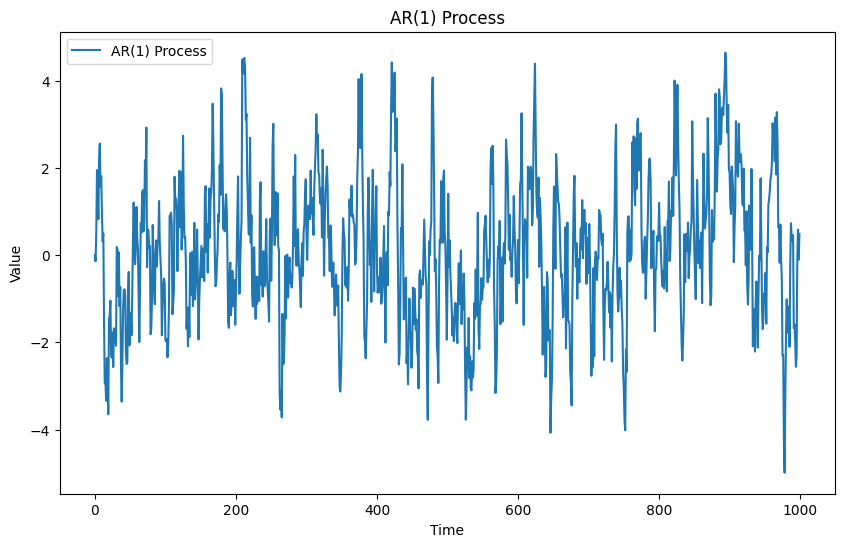

In [21]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# 예시 데이터 생성
np.random.seed(42)
n = 1000
phi = 0.8  # AR(1) 계수
y = np.zeros(n)
epsilon = np.random.normal(size=n)

# AR(1) 모델 데이터 생성
for t in range(1, n):
    y[t] = phi * y[t-1] + epsilon[t]

# 시계열 데이터로 변환
series = pd.Series(y)

# AR(1) 모델 적합
model = sm.tsa.ARIMA(series, order=(1, 0, 0))
results = model.fit()

# AR(1) 계수 추정
phi_hat = results.arparams[0]

# 반감기 계산
half_life = np.log(2) / np.log(1 / abs(phi_hat))

print(f'Estimated AR(1) coefficient: {phi_hat}')
print(f'Half-life: {half_life} periods')

# 시계열 데이터 시각화
plt.figure(figsize=(10, 6))
plt.plot(series, label='AR(1) Process')
plt.title('AR(1) Process')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [23]:
results.params

const     0.092996
ar.L1     0.796162
sigma2    0.957642
dtype: float64

In [ ]:

# 자산 이름
first_asset_name = '대교'
second_asset_name = 'CJ CGV'
X = Data[first_asset_name].values
Y = Data[second_asset_name].values

N = len(Data)  # 총 기간
month = 21  # 1달은 21일
year = 252  # 1년은 252일
Return = np.zeros((N // month) - 18 + 1)  # length: 102
n_open = 0
n_sell = 0

for k in range((N // month) - 18 + 1):
    learning_period = slice(month * (k), month * (k) + year)
    trading_period = slice(month * (k) + year, month * (k) + year + month * 6)
    
    in_X = X[learning_period]
    in_Y = Y[learning_period]
    out_X = X[trading_period]
    out_Y = Y[trading_period]
    
    # 회귀 모델 적합
    in_model = sm.OLS(in_X, sm.add_constant(in_Y)).fit()
    
    in_obj_price = in_X - in_model.params[0] - in_model.params[1] * in_Y
    out_obj_price = out_X - in_model.params[0] - in_model.params[1] * out_Y
    
    insample_sd = np.std(in_obj_price)
    
    index = np.where(np.abs(out_obj_price) > (2 * insample_sd))[0]
    
    if len(index) != 0:
        signal_date = month * (k) + year + index[0]
        n_open += 1
        
        pair_ind = out_obj_price[index[0]] < 0
        
        ind1 = int(pair_ind) - int(not pair_ind)
        ind2 = int(not pair_ind) - int(pair_ind)
        
        W = np.array([
            ind1 * (1 / X[signal_date + 1]),
            ind2 * (1 / Y[signal_date + 1])
        ])
        
        port = np.dot(W, np.vstack([
            X[(signal_date + 1):(month * (k) + year + month * 6)],
            Y[(signal_date + 1):(month * (k) + year + month * 6)]
        ]))
        
        plt.plot(port)
        plt.title(f'Portfolio Returns (Window {k+1})')
        plt.axhline(y=0, color='blue', linestyle='--')
        plt.show()
        
        ind_sell = np.where(out_obj_price[(index[0] + 1):] * out_obj_price[(index[0] + 1)] <= 0)[0]
        
        if len(ind_sell) == 0:
            ret = port[-1]
        else:
            ret = port[min(ind_sell[0] + 1, len(port) - 1)]
            n_sell += 1
            print(k)
    else:
        ret = 0
    
    Return[k] = ret

# 결과 출력
print(f'N: {N}')
print(f'n_sell: {n_sell}')
print(f'n_open: {n_open}')
print(f'Return: {Return}')
print(f'mean(Return): {np.mean(Return)}')

plt.plot(Return)
plt.axhline(y=0, color='blue', linestyle='--')
plt.title('Cumulative Returns')
plt.show()